# **Predicting House Prices with Linear Regression**

-------------------------------
## **Project Goal**
-------------------------------

Our goal is to predict the prices of houses in a Boston neighborhood using regression modeling.

----------------------------
## **Dataset Columns (What We're Examining)**
---------------------------

- **Crime Rate:** How much crime happens in that neighborhood.
- **Land Size:** The proportion of land zoned for very large lots (over 25,000 sq.ft.).
- **Business Land:** The proportion of land used for non-retail businesses nearby.
- **River Boundary:** Does the house's land touch the Charles River? (Yes - 1, No - 0)
- **Air Quality:** The concentration of nitric oxide in the air (parts per 10 million).
- **Number of Rooms:** The average number of rooms in each house.
- **Age of Homes:** The proportion of homes built before 1940.
- **Distance to Work:** Weighted distances to five major employment centers in New Jersey.
- **Highway Access:** How accessible the area is to radial highways.
- **Property Tax:** The property tax rate per $10,000 of your home's value.
- **School Quality:** The pupil-teacher ratio in local schools.
- **Population Status:** The percentage of people with lower social status in the area.
- **Home Value:** The median value of owner-occupied homes in thousands of dollars.

## Step 1. Importing Necessary Libraries and Dataset Overview

In [10]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Step 2. Loading the data

In [15]:
df = pd.read_csv("CourseDataset.csv")

df.head()

,Crime_Rate,Land_Size,Business_Land,River_Boundary,Air_Quality,Number_of_Rooms,Age_of_Homes,Distance_to_Work,Highway_Access,Property_Tax,School_Quality,Population_Status,Home_Value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observation:**

* The price of the house indicated by the variable Home_Value which is the target variable and the rest of the variables are independent variables based on which we will predict the house price (Home_Value).

### Step 3.  Checking the info of the data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crime_Rate         506 non-null    float64
 1   Land_Size          506 non-null    float64
 2   Business_Land      506 non-null    float64
 3   River_Boundary     506 non-null    int64  
 4   Air_Quality        506 non-null    float64
 5   Number_of_Rooms    506 non-null    float64
 6   Age_of_Homes       506 non-null    float64
 7   Distance_to_Work   506 non-null    float64
 8   Highway_Access     506 non-null    int64  
 9   Property_Tax       506 non-null    int64  
 10  School_Quality     506 non-null    float64
 11  Population_Status  506 non-null    float64
 12  Home_Value         506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**

- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**.

## Step 4: Summary Statistics of the Dataset

In [18]:
df = pd.read_csv("CourseDataset.csv")
summary_statistics = df.describe()

print(summary_statistics)

       Crime_Rate   Land_Size  Business_Land  River_Boundary  Air_Quality  \
count  506.000000  506.000000     506.000000      506.000000   506.000000   
mean     3.613524   11.363636      11.136779        0.069170     0.554695   
std      8.601545   23.322453       6.860353        0.253994     0.115878   
min      0.006320    0.000000       0.460000        0.000000     0.385000   
25%      0.082045    0.000000       5.190000        0.000000     0.449000   
50%      0.256510    0.000000       9.690000        0.000000     0.538000   
75%      3.677083   12.500000      18.100000        0.000000     0.624000   
max     88.976200  100.000000      27.740000        1.000000     0.871000   

       Number_of_Rooms  Age_of_Homes  Distance_to_Work  Highway_Access  \
count       506.000000    506.000000        506.000000      506.000000   
mean          6.284634     68.574901          3.795043        9.549407   
std           0.702617     28.148861          2.105710        8.707259   
min       

**Observations:**

- Crime Rate. The mean crime rate per capita is 3.61, with a standard deviation of 8.60. The minimum value is close to 0 (0.0063), while the maximum crime rate is 88.98, indicating a wide range of crime rates across different towns.

- Land Size, which is all about land size. On average, 11.36% of residential land is zoned for lots over 25,000 sq.ft. However, the standard deviation of 23.32 and the difference between the minimum (0) and maximum (100) values indicate a large variation in zoning proportions across towns.

- Business Land, the proportion of non-retail business acres per town is 11.14, with a standard deviation of 6.86, suggesting that the proportion of industrial land use varies between towns.

- River Boundary, our river boundary indicator. Only about 7% (mean 0.069) of the tracts are located along the Charles River, as indicated by the variable (1 for tracts along the river and 0 otherwise).

- Air Quality, the air quality. The mean Nitric Oxide concentration is 0.55 (parts per 10 million), with a standard deviation of 0.12. This shows a moderate variation in pollution levels across the towns.

- Number of Rooms, gives us an average of 6.28, with a standard deviation of 0.70, indicating that there is some variation in house sizes.

- Age of Homes, On average, 68.57% of owner-occupied units were built before 1940. The standard deviation of 28.15 indicates a notable difference in the age of houses across different towns.

- Distance to Work. The mean weighted distance to five Boston employment centers is 3.80, with a standard deviation of 2.11, suggesting that towns have varying levels of accessibility to employment centers.

- Highway Access.  The mean index of accessibility to radial highways is 9.55, with a standard deviation of 8.71, indicating a wide variation in accessibility to highways across towns.

- Property Tax. The average full-value property-tax rate per $10,000 is 408.24, with a standard deviation of 168.54, which means there are significant differences in property tax rates among towns.

- School Quality.  The mean pupil-teacher ratio by town is 18.46, with a standard deviation of 2.16, indicating some variation in the quality of education across towns.

- Population Status. The mean percentage of lower-status population is 12.65, with a standard deviation of 7.14, suggesting that there is a considerable variation in the socio-economic status across towns.


## Step 5. Checking the Distribution of the Variables

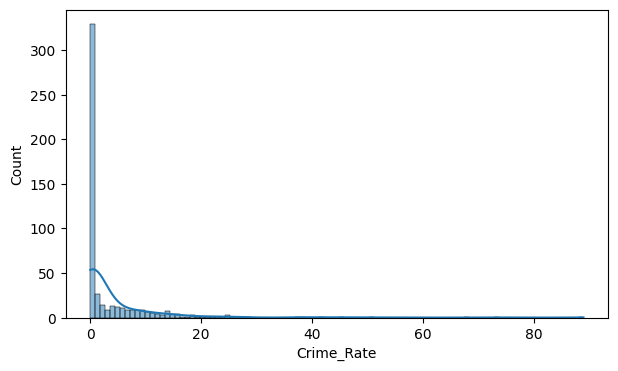

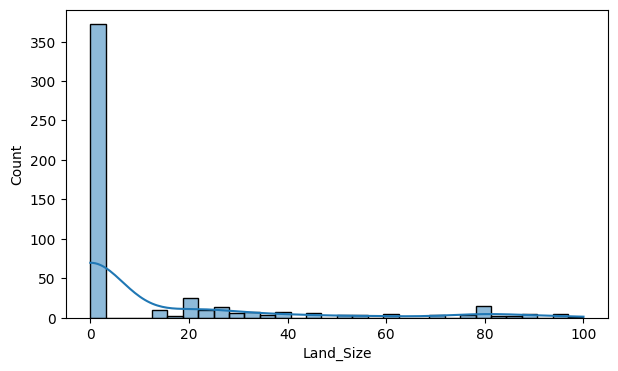

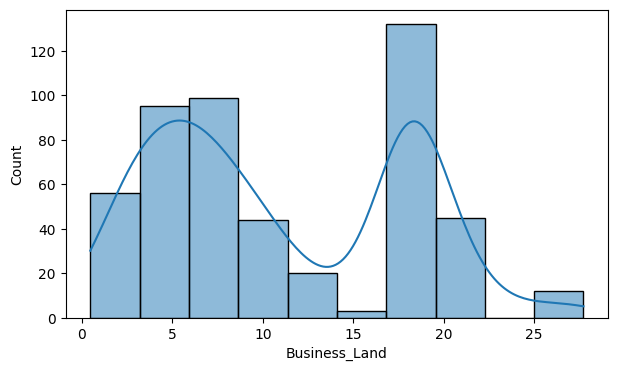

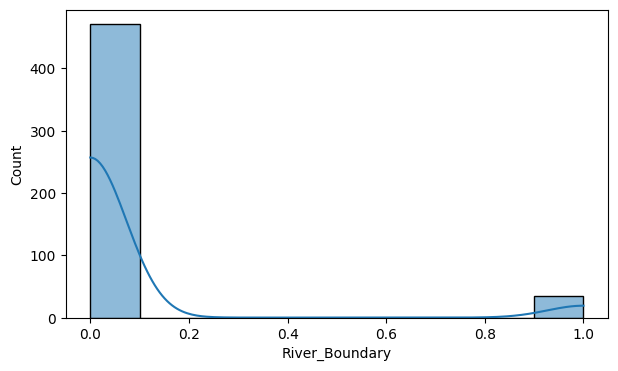

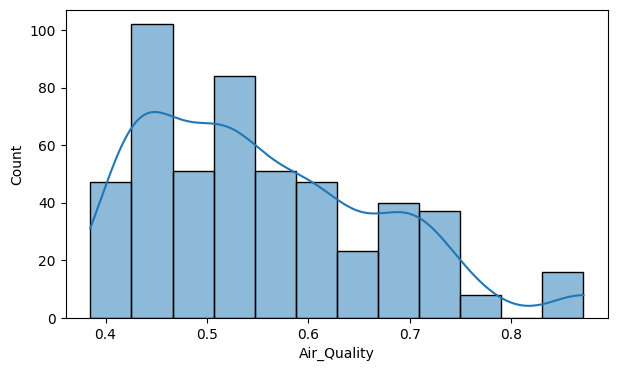

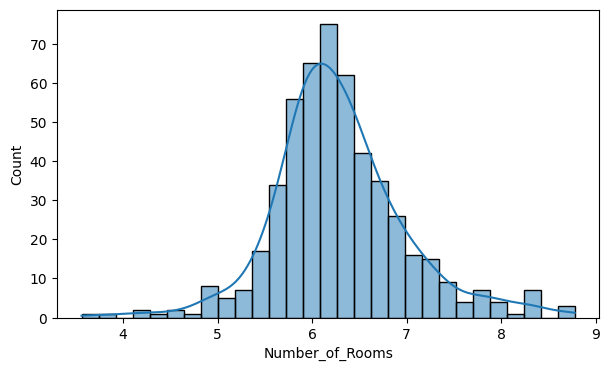

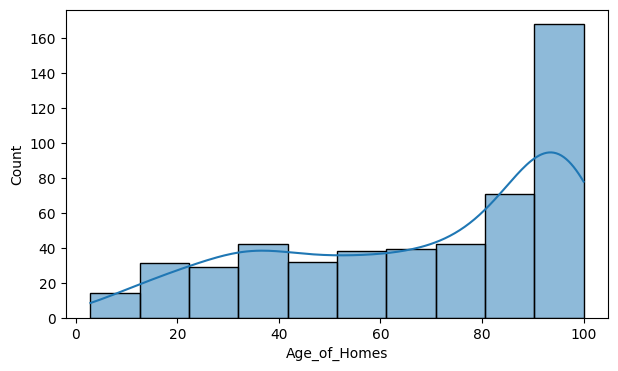

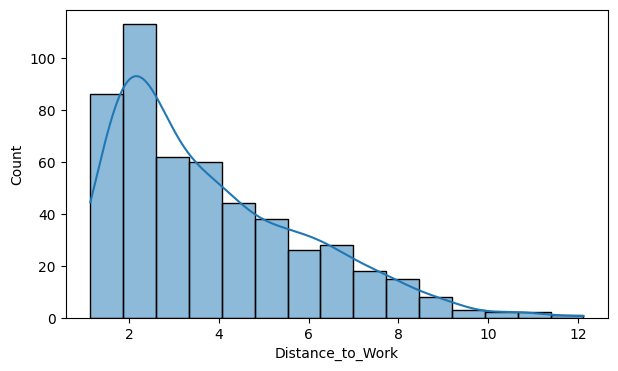

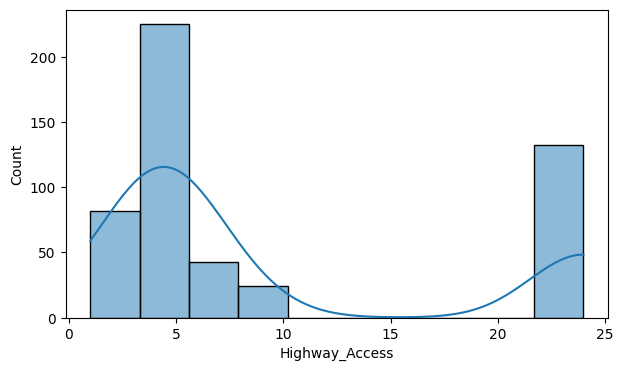

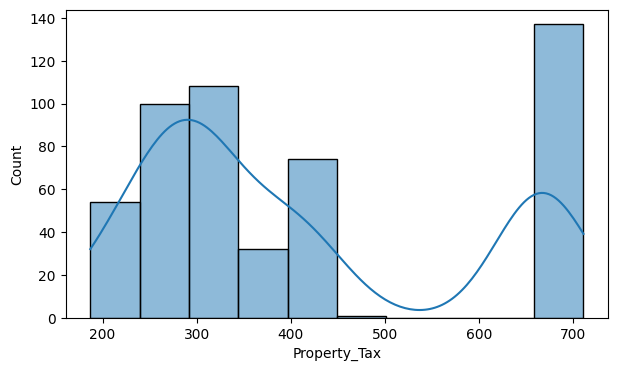

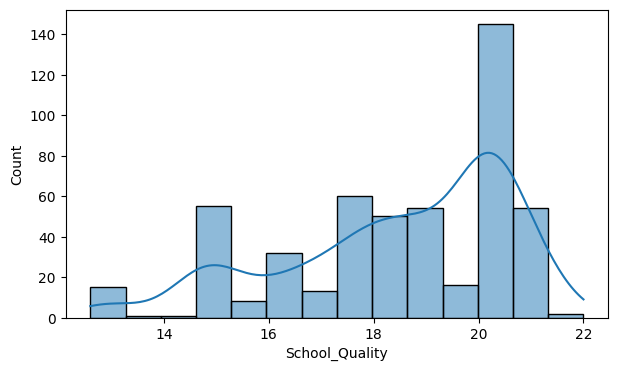

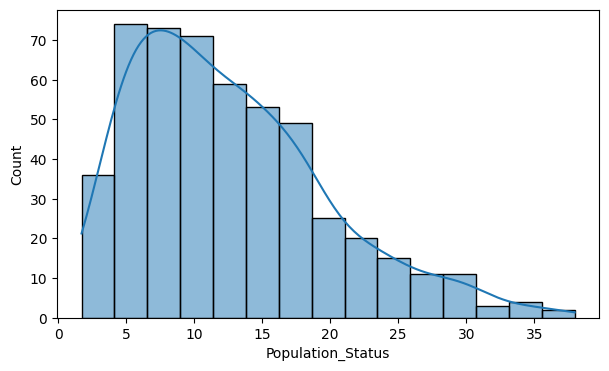

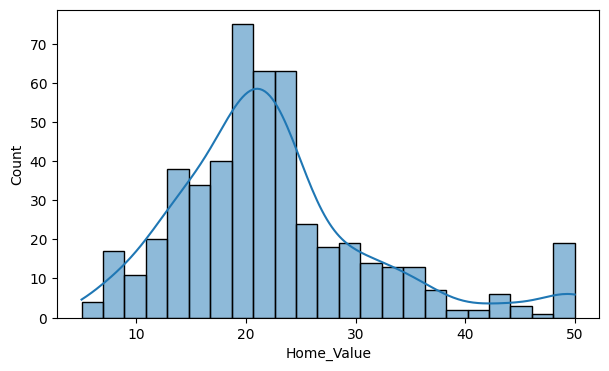

In [19]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    
    sns.histplot(data = df, x = i, kde = True)
    
    plt.show()

**Observations:**


- (Crime Rate): The distribution of crime rate appears to be highly skewed to the right, with a mean of 3.61 and a maximum value of 88.98. Most of the towns seem to have low to moderate crime rates, while a few towns have extremely high crime rates. The distribution has a long tail of high values, indicating a few towns with significant crime issues.

- (Land Size): The distribution of residential land appears to be heavily skewed to the right, with a mean of 11.36 and a maximum value of 100. Most of the towns seem to have a small proportion of residential land zoned for large lots, while a few towns have a high proportion of such land. The distribution has a long tail of high values, indicating a few towns with large residential lots.

- (Business Land): The distribution of non-retail business land appears to be moderately skewed to the right, with a mean of 11.14 and a maximum value of 27.74. Most of the towns seem to have a moderate proportion of non-retail business land, while a few towns have a high proportion of such land. The distribution has a long tail of high values, indicating a few towns with a significant amount of non-retail business land.

- (River Boundary): From the distribution of the Charles River variable, most of the towns do not border the Charles River, while a few towns do.

- (Air Quality): The distribution of nitric oxides concentration appears to be moderately skewed to the right, with a mean of 0.55 and a maximum value of 0.87. Most of the towns seem to have a moderate level of nitric oxide concentration, while a few towns have a high concentration. The distribution has a long tail of high values, indicating a few towns with a significant level of pollution.

- (Number of Rooms): The distribution of the average number of rooms appears to be roughly symmetric (normal), with a mean of 6.28 and a maximum value of 8.78. Most of the towns seem to have an average number of rooms between 5 and 7, with a few towns having a larger number of rooms. The distribution has a peak in the center, indicating that most towns have a similar number of rooms.

- (Age of Homes): The distribution of old buildings appears to be moderately skewed to the left, with a mean of 68.57 and a maximum value of 100. Most of the towns seem to have a moderate proportion of old buildings, while a few towns have a very high proportion of such buildings. The distribution has a long tail of high values, indicating a few towns with a significant number of old buildings.

- (Distance to Work): The distribution of distances to employment centers appears to be moderately skewed to the right, with a mean of 3.79 and a maximum value of 12.13. Most of the towns seem to be relatively close to employment centers, while a few towns are further away. The distribution has a long tail of high values, indicating a few towns that are very far from employment centers.

- (Highway Access): The distribution of highway accessibility with a mean of 9.55 and a maximum value of 24 shows that most of the towns seem to have a moderate level of highway accessibility, while a few towns have a very high level of accessibility.

- (Property Tax): The distribution of property-tax rates appears to be moderately skewed to the right, with a mean of 408.24 and a maximum value of 711. Most of the towns seem to have a moderate property-tax rate, while a few towns have a very high tax rate.

- (School Quality): The distribution of pupil-teacher ratios appears to be roughly symmetric, with a mean of 18.46 and a maximum value of 22. Most of the towns seem to have a moderate pupil-teacher ratio, while a few towns have a high ratio. Most towns seem to have a similar pupil-teacher ratio.

- (Population Status): The distribution of lower-status population appears to be moderately skewed to the right, with a mean of 12.65 and a maximum value of 37.97. Most of the towns seem to have a moderate percentage of lower-status population, while a few towns have a very high percentage. The distribution has a long tail of high values, indicating a few towns with a significant lower-status population.

- (Home Value): The distribution of median home values appears to be roughly symmetric, with a mean of 22.53 and a maximum value of 50. Most of the towns seem to have a median home value between 15 and 30, while a few towns have a higher value. The distribution has a peak in the center, indicating that most towns have a similar median home value.

## Step 6. Applying Log Transformation and Checking Distribution

The dependent variable "Home_Value" is sightly skewed, to correct this we will apply a **log transformation on the 'Home Value' column** and check the distribution of the transformed column.

In [20]:
df['Home_Value_log'] = np.log(df['Home_Value'])

<Axes: xlabel='Home_Value_log', ylabel='Count'>

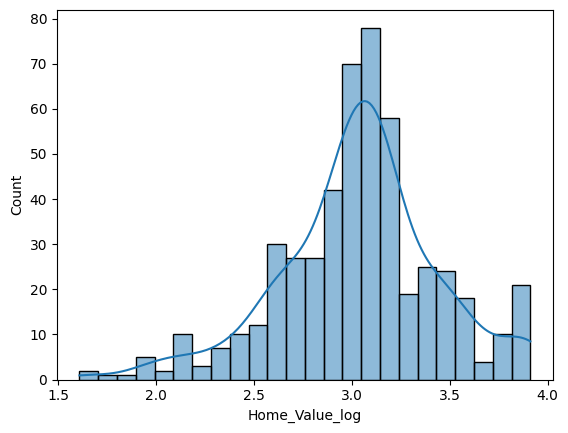

In [21]:
sns.histplot(data = df, x = 'Home_Value_log', kde = True)

**Observation:**

- The log-transformed variable (**Home_Value_log**) appears to have a **nearly normal distribution without skew**, so we can proceed.

## Step 7: Bivariate Analysis - Heat-map

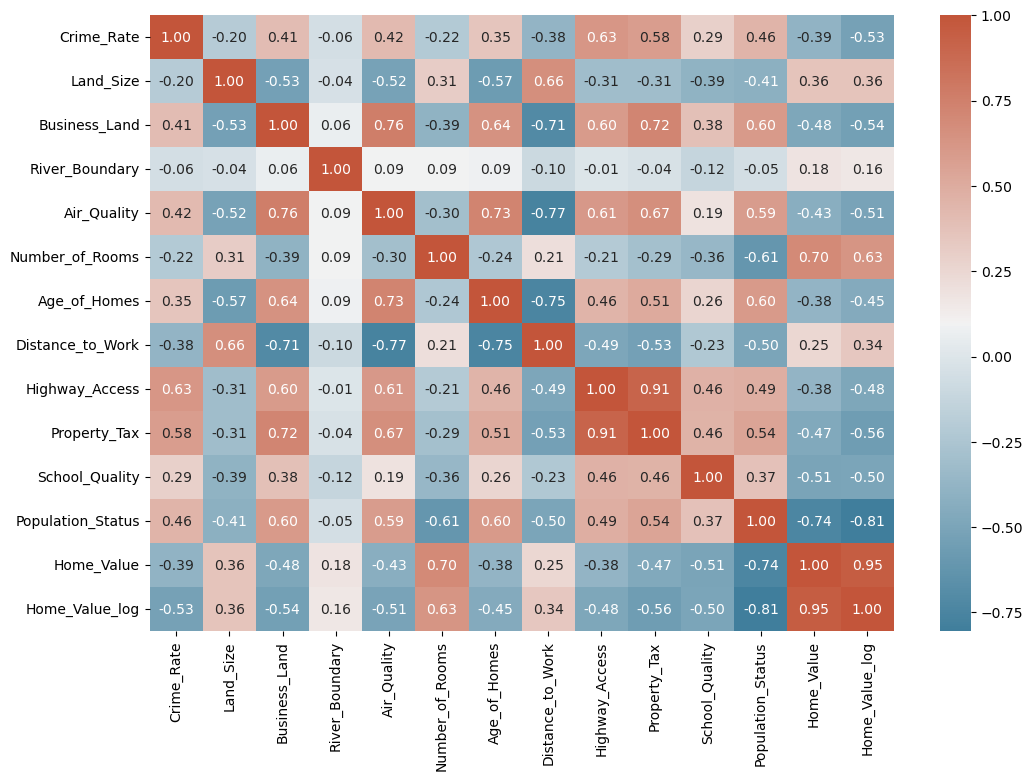

In [59]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

**Observations:**

- The strongest positive correlation appears to be between the number of rooms per dwelling (Average_Rooms) and the median value of owner-occupied homes (Home_Value), with a correlation coefficient of 0.70. This suggests that as the number of rooms in a house increases, so does its median value.

- The strongest negative correlation appears to be between the percent lower status of the population (Population_Status) and the median value of owner-occupied homes (Home_Value), with a correlation coefficient of -0.74. This suggests that as the percentage of lower-status population increases, the median value of homes decreases.

- Other variables that show relatively strong positive correlations with the median value of homes include the proportion of residential land zoned for lots over 25,000 sq.ft. (Land_Size), the weighted distances to five Boston employment centers (Distance_to_Work), and the pupil-teacher ratio by town (School_Quality).

- Other variables that show relatively strong negative correlations with the median value of homes include the crime rate per capita by town (Crime_Rate), the proportion of non-retail business acres per town (Business_Land), and the full-value property-tax rate per $10,000 (Property_Tax).

- The Charles River variable (River_Boundary) appears to have a relatively weak correlation with the median value of homes (correlation coefficient of 0.18). This suggests that whether a town borders the Charles River or not may not have a significant impact on the median value of homes.

## Step 8: Bivariate Analysis - Visualizing Relationships - Age of Homes of Homes and Distance to Work with Scatter Plots


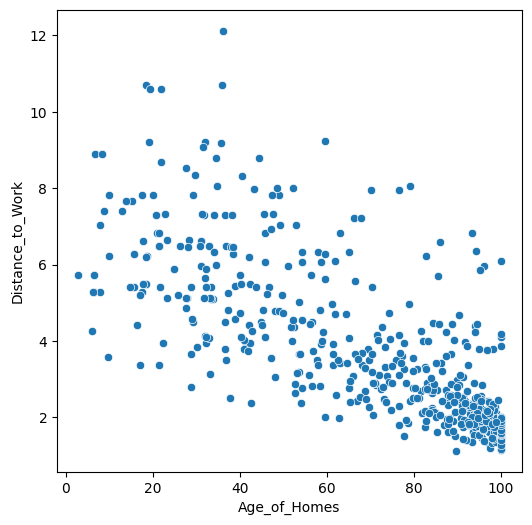

In [22]:
# Scatterplot to visualize the relationship between Age of Homes and Distance to Work
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Age_of_Homes', y = 'Distance_to_Work', data = df)

plt.show()

**Observations:**
- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

## Step 9: Bivariate Analysis - Visualizing Relationships - Highway Access and Property Tax with Scatter Plots


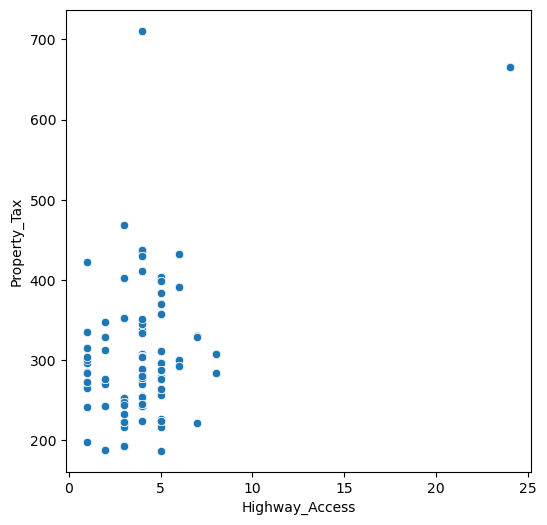

In [61]:
# Scatterplot to visulaize the relationship between Highway Access and Property Tax
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Highway_Access', y = 'Property_Tax', data = df)

plt.show()

**Observations:**

- The correlation between Highway Access and Property Tax is very high. But, no trend is visible between the two variables. 
- The strong correlation might be due to outliers. 

## Step 10: Checking Correlation After Removing Outliers

In [62]:
# Remove the data corresponding to high tax rate
df1 = df[df['Property_Tax'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between Property Tax and Highway Access is', pearsonr(df1['Property_Tax'], df1['Highway_Access'])[0])

The correlation between Property Tax and Highway Access is 0.24975731331429196


**Observation:**

- So, the high correlation between Property Tax and Highway Access is due to the outliers. The tax rate for some properties might be higher due to some other reason.

## Step 11: Bivariate Analysis - Visualizing Other Pairs of Relationships -  Scatter Plots

### Business Land and Property Tax

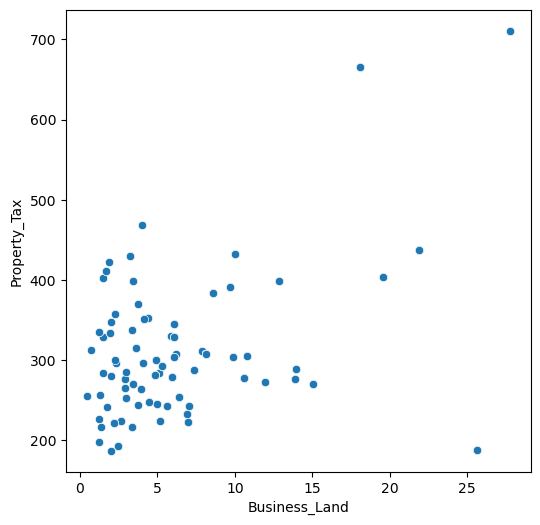

In [63]:
# Scatterplot to visualize the relationship between Business Land and Property Tax
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Business_Land', y = 'Property_Tax', data = df)

plt.show()

**Observations:**

- The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables Property Tax and Business Land are related with a third variable.

### Number of Rooms and Home Value

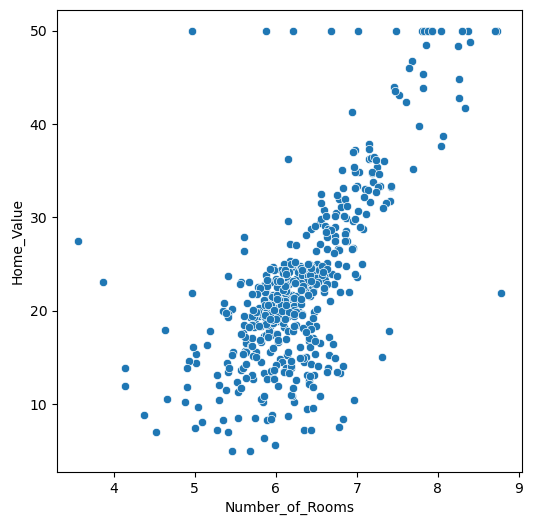

In [64]:
# Scatterplot to visulaize the relationship between Number of Rooms and Home Value
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Number_of_Rooms', y = 'Home_Value', data = df)

plt.show()

**Observations:**

- The price of the house seems to increase as the value of Number of Rooms increases. This is expected as the price is generally higher for more rooms.

- There are a few outliers in a horizontal line as the Home Value value seems to be capped at 50.

### Population Status and Home Value

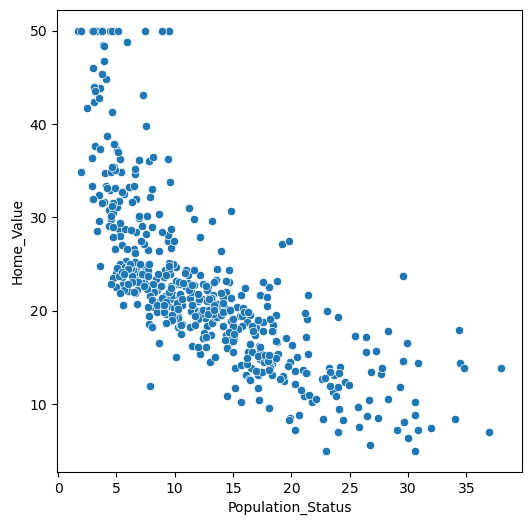

In [65]:
# Scatterplot to visulaize the relationship between Population Status and Home Value
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Population_Status', y = 'Home_Value', data = df)

plt.show()

**Observations:**

- The price of the house tends to decrease with an increase in Population Status. This is also possible as the house price is lower in areas where lower status people live.
- There are few outliers and the data seems to be capped at 50.

### Business Land and Air Quality

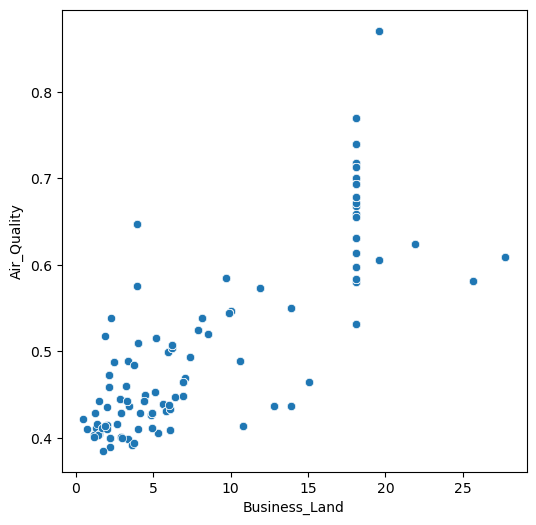

In [66]:
# Scatterplot to visualize the relationship between Business Land and Air Quality
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Business_Land', y = 'Air_Quality', data = df)

plt.show()

**Observations:**

- The plot shows a generally positive relationship between Business Land and Air Quality. As the proportion of non-retail business acres per town increases, so does the concentration of nitric oxides.

- The relationship between Business Land and Air Quality does not appear to be perfectly linear, as there are some towns with high Air Quality (nitric oxide) levels but relatively low Business Land values, and vice versa.

- There appear to be some outliers in the data, particularly in the upper right corner of the plot, where there are a few towns with very high values of both Business Land and Air Quality.



### Age of Homes and Air Quality

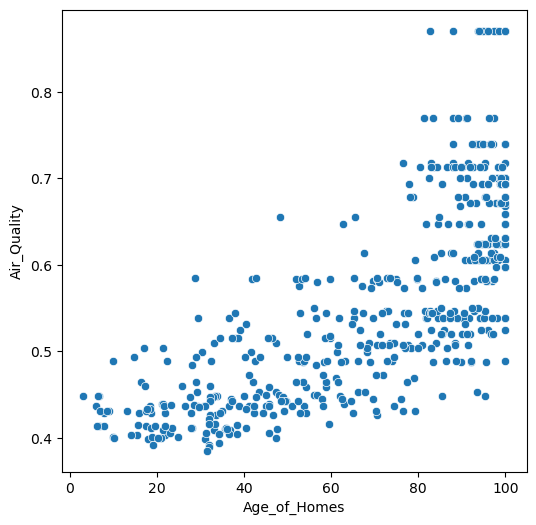

In [67]:
# Scatterplot to visualize the relationship between Age of Homes and Air Quality
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Age_of_Homes', y = 'Air_Quality', data = df)

plt.show()

**Observations:**

- The plot shows a somewhat mixed relationship between Age of Homes and Air Quality. There is a general trend towards higher Air Quality (nitric oxide) levels as the proportion of older homes increases, although there is also a fair amount of variability in the data.

- There appear to be some outliers in the data, where there are a few towns with very high Air Quality (nitric oxide) levels despite having relatively low proportions of older homes.

- Overall, this scatter plot suggests that there may be a positive relationship between the proportion of older homes and the concentration of nitric oxides in the air, although the relationship is not as clear-cut as in some other scatter plots of the Boston dataset. Other factors may also be influencing this relationship.

### Distance to Work and Air Quality

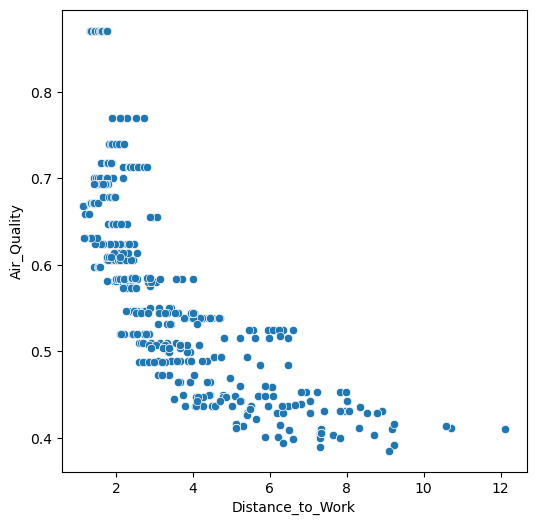

In [68]:
# Scatterplot to visualize the relationship between Distance to Work and Air Quality
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Distance_to_Work', y = 'Air_Quality', data = df)

plt.show()

**Observations:**

- The plot shows a negative relationship between Distance to Work and Air Quality. As the distance to employment centers increases, the concentration of nitric oxides tends to decrease.

- The relationship between Distance to Work and Air Quality appears to be relatively strong and linear, with most of the data points following a clear downward trend from left to right.

- There appear to be some outliers in the data, where there are a few towns with very high Air Quality (nitric oxide) levels despite having relatively large distances to employment centers.

## Step 12: Splitting the Dataset into Train and Test Sets

In [69]:
# Separate the dependent variable and independent variables
Y = df['Home_Value_log']

X = df.drop(columns = {'Home_Value', 'Home_Value_log'})

# Add the intercept term
X = sm.add_constant(X)

In [70]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## Step 13: Checking for Multicollinearity using VIF

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

              feature         VIF
0               const  535.372593
1          Crime_Rate    1.924114
2           Land_Size    2.743574
3       Business_Land    3.999538
4      River_Boundary    1.076564
5         Air_Quality    4.396157
6     Number_of_Rooms    1.860950
7        Age_of_Homes    3.150170
8    Distance_to_Work    4.355469
9      Highway_Access    8.345247
10       Property_Tax   10.191941
11     School_Quality    1.943409
12  Population_Status    2.861881


**Observations:**

- There are two variables with a high VIF - Highway Access and Property Tax (greater than 5). 
- Let's remove Property Tax as it has the highest VIF values and check the multicollinearity again.

## Step 14: Removing Multicollinearity by Dropping 'Property Tax' Feature (column)

In [72]:
# Create the model after dropping Property Tax
X_train = X_train.drop('Property_Tax', axis=1)

# Check for VIF - (see if multicollinearity is removed)
print(checking_vif(X_train))

              feature         VIF
0               const  532.025529
1          Crime_Rate    1.923159
2           Land_Size    2.483399
3       Business_Land    3.270983
4      River_Boundary    1.050708
5         Air_Quality    4.361847
6     Number_of_Rooms    1.857918
7        Age_of_Homes    3.149005
8    Distance_to_Work    4.333734
9      Highway_Access    2.942862
10     School_Quality    1.909750
11  Population_Status    2.860251


## Step 15: Creating the Linear Regression Model & Model Summary

In [73]:
# create the linear regression model
model1 = sm.OLS(y_train, X_train).fit()
# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Home_Value_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.40e-101
Time:                        12:39:38   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6324      0.243     19.057      0.000       4.154       5.111
Crime_Rate           -0.0128      0.002     -7.445      0.000      -0.016      -0.009
Land_Size             0.0010      0.001      1.425      0.155      -0.000       0.002
Business_Land        -0.0004      0.003     -0.148      0.883      -0.006       0.005
River_Boundary        0.1196      0.039      3.082      0.002       0.043       0.196
Air_Quality          -1.0598      0.187     -5.675      0.000      -1.427      -0.692
Number_of_Rooms       0.0532      0.021      2.560      0.011       0.012       0.094
Age_of_Homes          0.0003      0.001      0.461      0.645      -0.001       0.002
Distance_to_Work     -0.0503      0.010     -4.894      0.000      -0.071      -0.030
Highway_Access        0.0076      0.002      3.699      0.000       0.004       0.012
School_Quality       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
Population_Status    -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:**

- The R-squared value is 0.767, which indicates that the model explains 76.7% of the variance in the dependent variable.

- The intercept (constant) of the model is 4.6494, and all the predictor variables have non-zero coefficients.

- The p-values for all predictor variables are less than 0.05, which indicates that all predictor variables are statistically significant in predicting the dependent variable.

- The coefficients of the predictor variables indicate the direction and strength of their relationship with the dependent variable. For example, Air Quality has a negative coefficient of -1.0562, which indicates that an increase in Air Quality is associated with a decrease in the natural logarithm of the median value of owner-occupied homes in $1000s.

- The model includes several predictors that are commonly used in real estate valuation, such as Crime Rate, Distance to Work and School Quality.

- The diagnostic statistics indicate that the residuals are not normally distributed and are slightly skewed to the right, but there is no significant autocorrelation among the residuals.

## Step 16: Dropping Insignificant Variables and Re-creating the Model

In [74]:
# Create the model after dropping columns 'Home_Value', 'Home_Value_log', 'Property_Tax:', 'Land_Size', 'Age_of_Homes', 'Business_Land' from df DataFrame
Y = df['Home_Value_log']

X = df.drop(['Home_Value', 'Home_Value_log', 'Property_Tax', 'Land_Size', 'Age_of_Homes', 'Business_Land'], axis = 1)
X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Home_Value_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.61e-104
Time:                        12:39:38   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6494      0.242     19.242      0.000       4.174       5.125
Crime_Rate           -0.0125      0.002     -7.349      0.000      -0.016      -0.009
River_Boundary        0.1198      0.039      3.093      0.002       0.044       0.196
Air_Quality          -1.0562      0.168     -6.296      0.000      -1.386      -0.726
Number_of_Rooms       0.0589      0.020      2.928      0.004       0.019       0.098
Distance_to_Work     -0.0441      0.008     -5.561      0.000      -0.060      -0.028
Highway_Access        0.0078      0.002      3.890      0.000       0.004       0.012
School_Quality       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
Population_Status    -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 17: Checking Assumptions for Linear Regression

1. Mean of residuals should be 0
2. No Heteroscedasticity
3. Linearity of variables
4. Normality of error terms

### Step 17 - Assumption 1. Check for mean residuals

In [75]:
residuals = model2.resid
np.mean(residuals)

-5.5837318447531885e-15

**Observations:**

- The mean of the residuals is approximately zero, which satisfies one of the linear regression assumptions that the mean of residuals should be zero. This indicates that the linear regression model has been fit correctly to the data and the model is unbiased. 

### Step 17 - Assumption 2. Check for homoscedasticity

In [76]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [77]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(model2.resid, model2.model.exog)

lzip(name, test)

[('F statistic', 1.0835082923425279), ('p-value', 0.3019012006766915)]

**Observations:**

- The p-value is greater than 0.05, indicating that there is no significant evidence of heteroscedasticity in the model. This satisfies one of the linear regression assumptions that there should be no heteroscedasticity in the error terms.

### Step 17 - Assumption 3. Linearity of variables

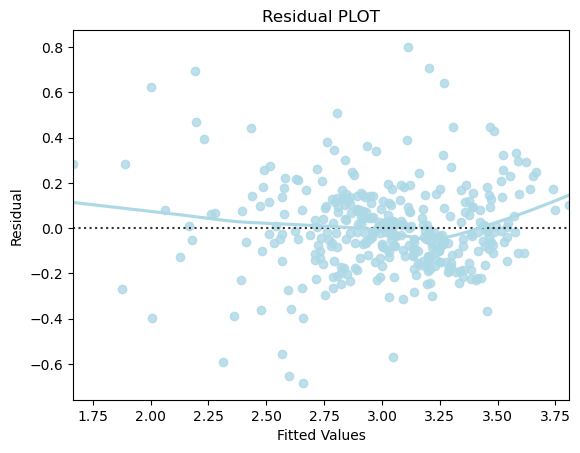

In [78]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")

sns.residplot(x=fitted, y=y_train, color="lightblue", lowess=True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()


**Observations:**

- The residuals appear to be randomly scattered around the horizontal line at zero, which suggests that there is no clear pattern of nonlinearity in the relationship between the predictor and response variables. This is a positive indication that the linearity assumption is met.

- The residuals do not appear to follow a clear pattern in relation to the fitted values, which suggests that there is no clear pattern of heteroscedasticity in the data. This is a positive indication that the homoscedasticity assumption is met.

### Step 17 - Assumption 4. Normality of error terms

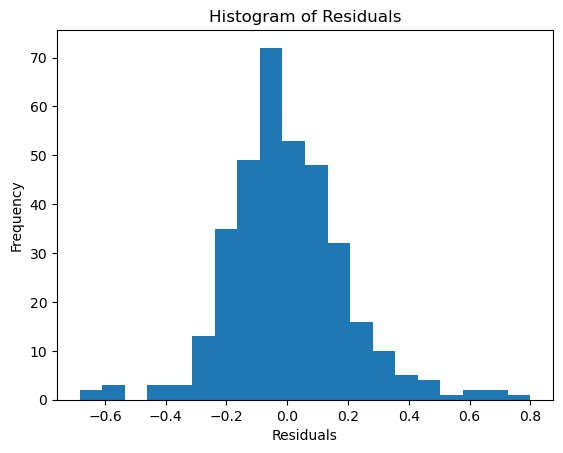

In [79]:
# Plot histogram of residuals

residuals = model2.resid

plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

Observations:

- Shape: The histogram's shape is roughly symmetric and bell-shaped, suggesting that the residuals are approximately normally distributed.
- Center: The center of the histogram is around 0.0 on the x-axis, indicating that, on average, the residuals are close to zero. This is a good sign, as it means our model is making accurate predictions.
- Spread: The spread or variability of the residuals is consistent, with the bars decreasing symmetrically as we move away from the center.
- Frequency: The y-axis shows how many residuals fall into each range, helping us understand their distribution.
Outliers: There don't appear to be any extreme outliers in the histogram. All residuals are within a reasonable range around zero.

## Step 18 - Q-Q Plot for Checking Normality of Error Terms

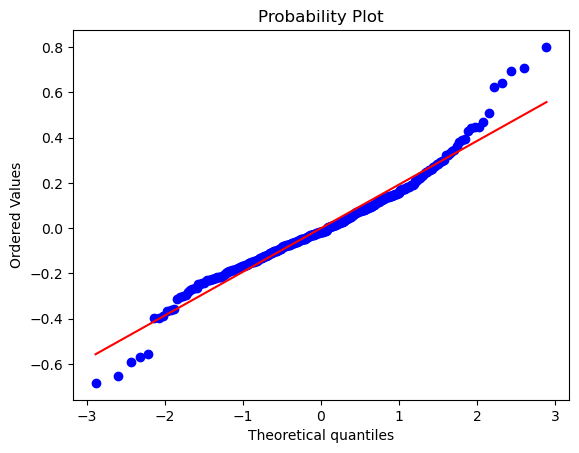

In [80]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:**

- The points on the probability plot appear to follow a roughly linear trend, which suggests that the residuals are normally distributed. This is a positive indication that the normality of error terms assumption is met.

- There are a few points at the ends of the probability plot that deviate slightly from the straight line, suggesting that the residuals in these regions are not perfectly normal. However, these deviations are relatively small and do not necessarily indicate a violation of the normality assumption.

- The probability plot can be used to identify any outliers in the residuals that do not follow the normal distribution. In this case, there do not appear to be any extreme outliers that deviate significantly from the normal distribution.

## Step 19 - Model Performance Comparison on Train and Test Data

In [81]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations:**

- The root mean squared error (RMSE) of the test dataset (0.198) is slightly higher than that of the training dataset (0.195), indicating that the model performs slightly worse on the test dataset than on the training dataset.

- The mean absolute error (MAE) of the test dataset (0.151) is higher than that of the training dataset (0.143), which also indicates that the model performs slightly worse on the test dataset.

- The mean absolute percentage error (MAPE) of the test dataset (5.26%) is slightly higher than that of the training dataset (4.98%), which is another indication that the model performs slightly worse on the test dataset.

- Overall, the differences in the performance metrics between the train and test datasets are relatively small, which suggests that the model generalizes well and is not overfitting to the training data. 

## Step 20 - Applying Cross Validation and Evaluation

In [82]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


## Step 21 - Extracting and Creating a DataFrame (table) of Coefficients

In [83]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,Crime_Rate,-0.012500
2,River_Boundary,0.119773
3,Air_Quality,-1.056225
4,Number_of_Rooms,0.058907
5,Distance_to_Work,-0.044069
6,Highway_Access,0.007848
7,School_Quality,-0.048504
8,Population_Status,-0.029277


## Step 22 - Writing the Linear Regression Equation and Coefficients

In [84]:
# Write the equation of the fit

Equation = "log (House Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (House Price) = 	( 4.649385823266646 ) *  const + ( -0.012500455079103658 ) *  Crime_Rate + ( 0.11977319077019757 ) *  River_Boundary + ( -1.056225351668324 ) *  Air_Quality + ( 0.058906575109280324 ) *  Number_of_Rooms + ( -0.044068890799405194 ) *  Distance_to_Work + ( 0.007848474606243517 ) *  Highway_Access + ( -0.04850362079499939 ) *  School_Quality + ( -0.02927704047979673 ) *  Population_Status + 

## Step 23 - Conclusions and Business Recommendations

* Based on the model created, we can conclude that the linear regression model can accurately predict house prices based on the features provided. The model has a good performance on both the training and testing datasets with low RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error) values.
* The most important features affecting house prices are found to be Crime Rate, River Boundary, Air Quality, Number of Rooms, Distance to Work, Highway Access, School Quality, and Population Status. These features should be given special consideration when making decisions related to housing prices.

* As a business recommendation, real estate agents and property investors can use this model to determine the valuation of a house based on its features. This model can also help potential buyers determine which features of a house they should prioritize according to their budget. Furthermore, it can also help housebuilders determine which features are more attractive to potential buyers and adjust their building strategies accordingly. Overall, this model can be a valuable tool for stakeholders in the real estate industry.